<a href="https://colab.research.google.com/github/NurullahORAK/Kutuphane-Otomsayonu/blob/main/SesAnaliziVeTanimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Colab'a hoş geldiniz.</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Yeni&#41; Gemini API'yi deneyin</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Colab hakkında zaten bilgi sahibiyseniz bu videoyu izleyerek etkileşimli tablolar, yürütülen kod geçmişi görünümü ve komut paleti hakkında bilgi edinebilirsiniz.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  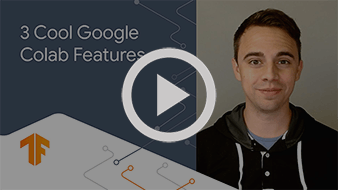
  </a>
</center>

# Yeni Bölüm

In [35]:
from google.colab import files

# Google Colab'e dosya yükleyin
uploaded = files.upload()


Saving Barış-Özcan.wav to Barış-Özcan (3).wav
Saving CEZA-‐-Clipchamp-ile-yapıldı-_1_.wav to CEZA-‐-Clipchamp-ile-yapıldı-_1_.wav


In [36]:
# Yüklenen dosyanın adını alın
file_path = list(uploaded.keys())[0]


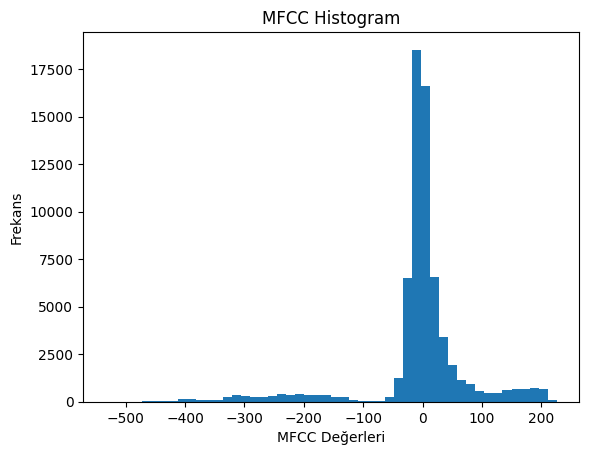

In [37]:
try:
    # Ses dosyasını yükle
    y, sr = librosa.load(file_path, sr=None)
except Exception as e:
    print(f"Dosya yüklenirken bir hata oluştu: {e}")
else:
    # Histogram oluştur
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.hist(mfccs.flatten(), bins=50)
    plt.title('MFCC Histogram')
    plt.xlabel('MFCC Değerleri')
    plt.ylabel('Frekans')
    plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

# Örnek eğitim verisi ve etiketler (X_train, y_train)
# Gerçek verilerle değiştirilmesi gerekiyor
X_train = np.random.rand(100, 13)  # 100 örnek, 13 MFCC
y_train = np.random.randint(0, 2, 100)  # 0 veya 1 etiketi

# Eğitim verilerini ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# SVM modelini eğit
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Test verisini ölçeklendir ve tahmin et
X_test = mfccs.T  # Transpoz alarak her sütunu bir örnek yap
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Tahminler:", predictions)


Tahminler: [1 1 1 ... 1 1 1]


In [40]:
from sklearn.metrics import accuracy_score, f1_score

# Gerçek etiketler (y_test) ve tahminler (predictions)
# Gerçek verilerle değiştirilmesi gerekiyor
y_test = np.random.randint(0, 2, X_test.shape[0])

# Doğruluk ve F1 skoru hesapla
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Doğruluk (ACC):", acc)
print("F1 Skoru (FM):", f1)


Doğruluk (ACC): 0.49864760432766614
F1 Skoru (FM): 0.2765542235851686


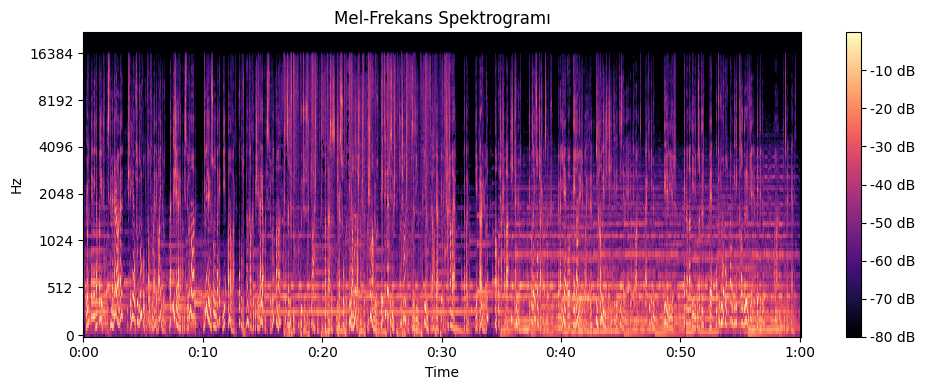

In [41]:
import numpy as np
import librosa.display

# Kısa zamanlı Fourier dönüşümü (STFT)
stft = np.abs(librosa.stft(y))

# Mel-frekans spektrogramı
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Mel-frekans spektrogramını çizdir
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-Frekans Spektrogramı')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [42]:
!pip install matplotlib-venn
import speech_recognition as sr

# Ses dosyasını yükleyin
r = sr.Recognizer()
with sr.AudioFile(file_path) as source:
    audio_data = r.record(source)
    text = r.recognize_google(audio_data, language='tr-TR')
    print("Metin:", text)

# Kelime sayma
word_count = len(text.split())
print("Kelime Sayısı:", word_count)


Metin: gördüklerimi yapmayı çok istememe rağmen işte yine oturduğum koltukta oturmaya devam ediyordum ben de bir şeyler yapmak istiyordum ama cümlelerin sonunda hep bir ama vardı o koltuktan kalkıp bir şeyler yapmak istiyordum ama çok zayıfım çok güçsüz Çok yavaşsın çok da parasız dışarısı soğuktu Dün Yağmur da başlamıştı başım ağrıyordu Elektrikler kesilmişti çalışamam hazır değildim Belki yarın ya da haftaya Yok yok çarşambaya yaparım diye bir karar veriyordum Ama o çarşambaya hiç gelmiyordu Çıkmaz ayın son çarşambası diyordu Ve ben yine o heyecan verici olayları ilham verici kişilikleri izlemeye hep devam ettirdi Belki bir gün birileri gelir ekrandan elini uzatır ve oturduğumu koltuktan Beni kaldırır diye hep bekledim ama kimseye gelmedi
Kelime Sayısı: 111


<div class="markdown-google-sans">
  <h2>Colab nedir?</h2>
</div>

Colab veya diğer adıyla "Colaboratory", tarayıcınızda Python'u yazmanızı ve çalıştırmanızı sağlar.
- Hiç yapılandırma gerektirmez
- GPU'lara ücretsiz erişim
- Kolay paylaşım imkanı sunar

İster <strong>öğrenci</strong> ister <strong>veri bilimci</strong> ister <strong>yapay zeka araştırmacısı</strong> olun, Colab işinizi kolaylaştırabilir. Daha fazla bilgi edinmek için <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab'e Giriş</a> videosunu izleyebilir ya da aşağıdan hemen kullanmaya başlayabilirsiniz.

<div class="markdown-google-sans">

## <strong>Başlarken</strong>
</div>

Okuduğunuz doküman statik bir web sayfası değil, kod yazmanıza ve yürütmenize imkan veren <strong>Colab not defteri</strong> adında etkileşimli bir ortamdır.

Örneğin, buradaki <strong>kod hücresinde</strong>, bir değeri hesaplayan, bir değişken içinde saklayan ve sonucu yazdıran kısa bir Python dizesi görebilirsiniz:

<div class="markdown-google-sans">

## Veri bilimi
</div>

Colab ile popüler Python kitaplıklarının tüm avantajlarından yararlanarak veri analiz edip görselleştirebilirsiniz. Aşağıdaki kod hücresi rastgele veri oluşturmak için <strong>numpy</strong>'yi, bu veriyi görselleştirmek için de <strong>matplotlib</strong>'i kullanır. Kodu düzenlemek için hücreyi tıklamanız yeterlidir. Sonrasında düzenlemeye başlayabilirsiniz.

Kendi verilerinizi Google Drive hesabınızdan &#40;e-tablolar dahil&#41;, GitHub'dan ve diğer pek çok kaynaktan Colab not defterlerine aktarabilirsiniz. Veri içe aktarma ve Colab'in veri bilimi için nasıl kullanılabileceği hakkında daha fazla bilgi edinmek için <a href="#working-with-data">Verilerle Çalışma</a> bölümünün altındaki bağlantılara bakabilirsiniz.

<div class="markdown-google-sans">

## Makine öğrenimi
</div>

Colab ile bir resim veri kümesini içe aktarabilir, üzerinde bir resim sınıflandırıcıyı eğitebilir ve modeli değerlendirebilirsiniz. Hem de sadece <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">birkaç satır kodla</a>. Colab not defterleri Google'ın bulut sunucularında kod yürütür. Yani makinenizin gücünden bağımsız olarak, <a href="#using-accelerated-hardware">GPU'lar ve TPU'lar</a> dahil Google donanımının gücünden yararlanabilirsiniz. Tek ihtiyacınız olan şey bir tarayıcıdır.

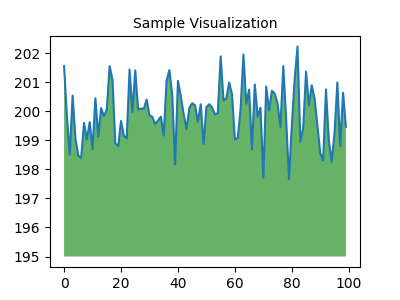

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab, makine öğrenimi topluluğunda yaygın olarak şu uygulamalarla kullanılır:
- TensorFlow'u kullanmaya başlama
- Nöral ağ geliştirme ve eğitme
- TPU'lar ile deneme yapma
- Yapay zeka araştırmalarını yayma
- Eğitici oluşturma

Makine öğrenimi uygulamalarını açıklayarak tanıtan örnek Colab not defterlerini görmek için aşağıdaki <a href="#machine-learning-examples">makine öğrenimi örneklerine</a> bakabilirsiniz.

<div class="markdown-google-sans">

## Diğer Kaynaklar

### Colab'de Not Defterleriyle Çalışma

</div>

- [Colaboratory'ye Genel Bakış](/notebooks/basic_features_overview.ipynb)
- [Markdown rehberi](/notebooks/markdown_guide.ipynb)
- [Kitaplıkları içe aktarma ve bağımlıları yükleme](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub'da not defteri kaydetme ve yükleme](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Etkileşimli formlar](/notebooks/forms.ipynb)
- [Etkileşimli widget'lar](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Verilerle Çalışma
</div>

- [Veri yükleme: Drive, E-Tablolar ve Google Cloud Storage](/notebooks/io.ipynb)
- [Grafikler: Veri görselleştirme](/notebooks/charts.ipynb)
- [BigQuery'yi kullanmaya başlama](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Makine Öğrenimi Hızlandırılmış Kursu

<div>

Google'ın online Makine Öğrenimi kursundan birkaç not defterini burada bulabilirsiniz. Daha fazlası için <a href="https://developers.google.com/machine-learning/crash-course/">tam kurs web sitesine</a> bakın.
- [Pandas DataFrame'e giriş](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Sentetik veriler kullanarak tf.keras ile doğrusal regresyon](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Hızlandırılmış Donanım Kullanma
</div>

- [GPU'lar ile TensorFlow](/notebooks/gpu.ipynb)
- [TPU'lar ile TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Öne çıkan örnekler

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia'nın NeMo etkileşimli AI araç setini kullanarak ses parçasındaki bir sesi, bilgisayar tarafından oluşturulan sesle değiştirin.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Bir Resim Sınıflandırıcıyı Yeniden Eğitme</a>: Çiçekleri ayırt etmek için önceden eğitilmiş bir resim sınıflandırıcının üzerine bir Keras modeli inşa eder.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Metin Sınıflandırma</a>: IMDB'deki film yorumlarını <em>olumlu</em> veya <em>olumsuz</em> olarak sınıflandırır.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Stil Aktarımı</a>: Resimler arasında stil aktarımı yapmak için derin öğrenmeyi kullanır.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Çok Dilli Evrensel Cümle Kodlayıcı Soru-Cevap</a>: SQuAD veri kümesinden soruları cevaplamak için bir makine öğrenimi modeli kullanır.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video İnterpolasyonu</a>: Bir videonun ilk ve son karesi arasında ne olduğunu tahmin eder.
